In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
data= pd.read_csv('Titanic_train.csv')

In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
len(data)

891

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
100 * data.isnull().sum() / len(data)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

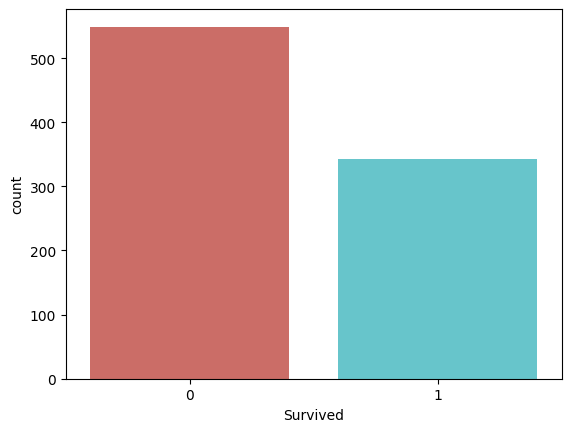

In [14]:
sns.countplot(x='Survived' , data=data , palette='hls')

<Axes: xlabel='Survived', ylabel='Pclass'>

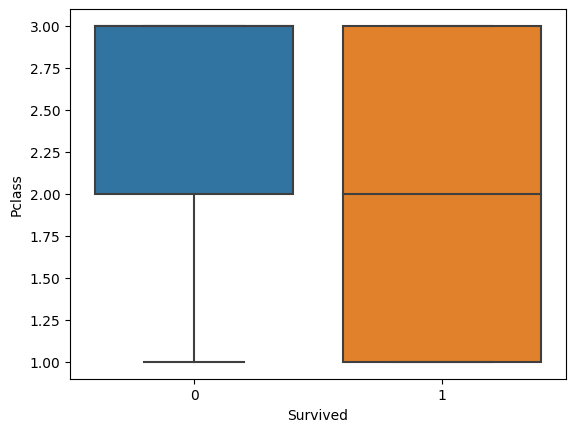

In [15]:
sns.boxplot(x='Survived' , y='Pclass' , data = data)

In [16]:
data.drop(['PassengerId' , 'Name' , 'Cabin' , 'Ticket'], axis=1, inplace=True)

In [20]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [49]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age): 
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 15
    else:
        return Age

In [51]:
titanic_data=data
titanic_data ['Age']=data[['Age','Pclass']].apply(age_approx,axis=1)

In [52]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [53]:
100*data.isnull().sum()/len(data)

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.000000
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Embarked    0.224467
dtype: float64

In [54]:
titanic_data.dropna(inplace= True)
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [55]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [56]:
gender = pd.get_dummies(titanic_data['Sex'], drop_first= True)
gender.head()

,male
0,True
1,False
2,False
3,False
4,True


In [57]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [58]:
titanic_dmy = pd.concat([titanic_data, gender], axis=1)
titanic_dmy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,male,22.0,1,0,7.2500,S,True
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,False
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


In [61]:
sns.heatmap(titanic_dmy.corr())

ValueError: could not convert string to float: 'male'

In [63]:
titanic_dmy.drop(['Fare','Pclass'],axis=1, inplace= True)
titanic_dmy.head()

KeyError: "['Fare', 'Pclass'] not found in axis"

In [36]:
import statsmodels.formula.api as smf

In [64]:
formula_reg_log = "Survived ~ Age + SibSp"
modelo_log = smf.logit(formula_reg_log, titanic_dmy).fit()
modelo_log.summary()

Optimization terminated successfully.
         Current function value: 0.664165
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            2
Date:                Tue, 30 May 2023   Pseudo R-squ.:                0.001634
Time:                        14:22:24   Log-Likelihood:                -590.44
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                    0.3805
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3068      0.166     -1.845      0.065      -0.633       0.019
Age           -0.0047      0.005     -0.934      0.350      -0.015       0.005
SibSp         -0.0809      0.067     -1.201      0.230      -0.213       0.051
==============================================================================
"""